In [91]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Explororatory data analysis

In [92]:
#import data as dataframe
df = pd.read_csv('account-defaults.csv', header = 0)

In [93]:
df.head()

,FirstYearDelinquency,AgeOldestIdentityRecord,AgeOldestAccount,AgeNewestAutoAccount,TotalInquiries,AvgAgeAutoAccounts,TotalAutoAccountsNeverDelinquent,WorstDelinquency,HasInquiryTelecomm
0,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
1,0,148.0,113.0,112.0,0.0,112.0,1.0,1.0,0.0
2,1,200.0,70.0,NaN,0.0,NaN,NaN,400.0,0.0
3,0,378.0,78.0,32.0,0.0,49.0,2.0,400.0,0.0
4,1,37.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11250 entries, 0 to 11249
Data columns (total 9 columns):
FirstYearDelinquency                11250 non-null int64
AgeOldestIdentityRecord             11118 non-null float64
AgeOldestAccount                    9910 non-null float64
AgeNewestAutoAccount                6286 non-null float64
TotalInquiries                      10840 non-null float64
AvgAgeAutoAccounts                  6286 non-null float64
TotalAutoAccountsNeverDelinquent    6286 non-null float64
WorstDelinquency                    9933 non-null float64
HasInquiryTelecomm                  11174 non-null float64
dtypes: float64(8), int64(1)
memory usage: 791.1 KB


In [95]:
# To start let's clean the data and remove all nans 
df = df.dropna()

In [96]:
df.head()

,FirstYearDelinquency,AgeOldestIdentityRecord,AgeOldestAccount,AgeNewestAutoAccount,TotalInquiries,AvgAgeAutoAccounts,TotalAutoAccountsNeverDelinquent,WorstDelinquency,HasInquiryTelecomm
1,0,148.0,113.0,112.0,0.0,112.0,1.0,1.0,0.0
3,0,378.0,78.0,32.0,0.0,49.0,2.0,400.0,0.0
5,1,91.0,66.0,7.0,2.0,19.0,2.0,1.0,0.0
7,0,254.0,123.0,40.0,0.0,77.0,2.0,1.0,0.0
10,0,121.0,98.0,68.0,1.0,83.0,1.0,1.0,0.0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6263 entries, 1 to 11246
Data columns (total 9 columns):
FirstYearDelinquency                6263 non-null int64
AgeOldestIdentityRecord             6263 non-null float64
AgeOldestAccount                    6263 non-null float64
AgeNewestAutoAccount                6263 non-null float64
TotalInquiries                      6263 non-null float64
AvgAgeAutoAccounts                  6263 non-null float64
TotalAutoAccountsNeverDelinquent    6263 non-null float64
WorstDelinquency                    6263 non-null float64
HasInquiryTelecomm                  6263 non-null float64
dtypes: float64(8), int64(1)
memory usage: 489.3 KB


roughly half the rows have some form of nan values. This is problematic, and there are many ways we can deal with it, such as using the median, or mean value in the column. In the interest of time, I am going to continue with just the half of the dataset that did not have any nan values for my visualizations. If given more time, I would research the values and decide for each column what is the best scenario for each column. 

first I want to see what the ages of the account look like for delinquent accounts. To do that, I am going to isolate the rows where FirstYearDelinquency = 1 and create a histogram Age oldest account 

In [98]:
#isolate delinquents and non-delinquents

delinquents = df[df.FirstYearDelinquency != 0]
nondelinquents = df[df.FirstYearDelinquency != 1]

In [99]:
delinquents.head()

,FirstYearDelinquency,AgeOldestIdentityRecord,AgeOldestAccount,AgeNewestAutoAccount,TotalInquiries,AvgAgeAutoAccounts,TotalAutoAccountsNeverDelinquent,WorstDelinquency,HasInquiryTelecomm
5,1,91.0,66.0,7.0,2.0,19.0,2.0,1.0,0.0
15,1,155.0,118.0,38.0,1.0,78.0,1.0,400.0,0.0
22,1,177.0,126.0,16.0,0.0,66.0,2.0,120.0,0.0
25,1,377.0,103.0,101.0,0.0,102.0,2.0,400.0,0.0
31,1,246.0,221.0,52.0,0.0,89.0,1.0,1.0,0.0


In [125]:
#let us just quickly find the average age of the oldest account for both delinquents and nondelinquents
delmean = delinquents['AgeOldestAccount'].mean()
print('mean age of oldest accounts of delinquents' , delmean)
nondelmean = nondelinquents['AgeOldestAccount'].mean()
print('mean age of oldest accounts of nondelinquents' , nondelmean)

mean age of oldest accounts of delinquents 137.69256434699713
mean age of oldest accounts of nondelinquents 147.7250900360144


The means are pretty similar, Let's look at the histograms to see it the distributions are similar as well. 

<function matplotlib.pyplot.show(*args, **kw)>

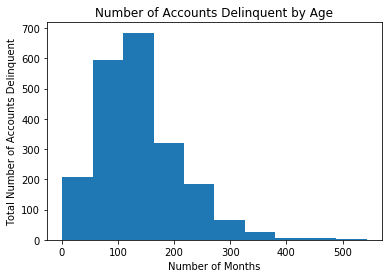

In [101]:
#now create a histogram using AgeOldestAccount

plt.hist(delinquents['AgeOldestAccount'], 10)
plt.xlabel('Number of Months')
plt.ylabel('Total Number of Accounts Delinquent')
plt.title('Number of Accounts Delinquent by Age')
plt.show

The Histogram is right skewed, which means that younger accounts are more likely to be delinquent. It is interesting to note that the highest number of delinquents is between 100 and 200. Now lets compare that to the nondelinquents

<function matplotlib.pyplot.show(*args, **kw)>

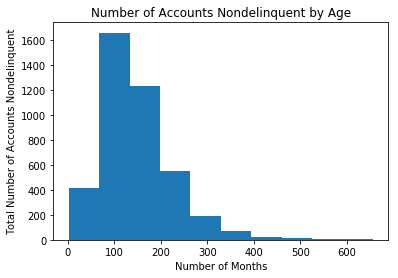

In [102]:
plt.hist(nondelinquents['AgeOldestAccount'], 10)
plt.xlabel('Number of Months')
plt.ylabel('Total Number of Accounts Nondelinquent')
plt.title('Number of Accounts Nondelinquent by Age')
plt.show

The histograms look similar in that they are both skewed right. This leads me to believe that the age of the oldest account does not have much impact on whether an account is delinquent or not.  

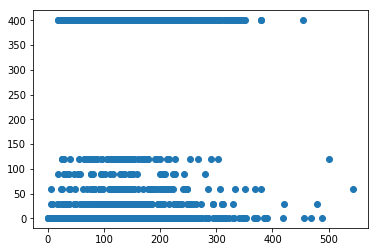

In [103]:
#let's see if there is a relationship between the age of the oldest account and the worst delinquency with a 
#scatter plot

plt.scatter(delinquents['AgeOldestAccount'], delinquents['WorstDelinquency'])
plt.show()

There does not seem to be any linear trends between the age of the oldest account and the worst delinquency. It is however, interesting to note that there does seem to be six different "levels" of delinquency. This might help us with our classification.

Now let us look at a correlation matrix to see if there is any linear relationship between the variables.

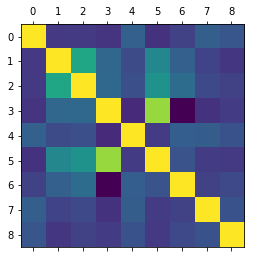

In [126]:
plt.matshow(df.corr())
plt.show()

The data does not seem to show high levels of correlation. This may mean that linear regression would be difficult to do with this dataset. What would be best is a classifier such as a k nearest neighbor.  

# Predictive model

In [127]:
#split dataset into train and test sets

y = df.iloc[:,0].values
x = df.iloc[:,1:9].values
X = preprocessing.scale(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33)

In [122]:
#build and train model

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


In [123]:
#Now to evaluate against the test dataset
y_pred = clf.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      1382
           1       0.43      0.30      0.36       685

   micro avg       0.64      0.64      0.64      2067
   macro avg       0.57      0.55      0.55      2067
weighted avg       0.61      0.64      0.62      2067



Per the recall, the model was only able to accurately predict when an account was delinquent. It was however, able to predict with far more accuracy if an account was not delinquent.  

# Vehicle depreciation analysis

In [128]:
df = pd.read_csv('vehicle-depreciation.csv')

In [129]:
df.head()

,VehicleID,CustomerGrade,AuctionPurchaseDate,AuctionPurchaseAmount,AuctionSaleDate,AuctionSaleAmount,VehicleType,Year,Make,Model,Trim,BodyType,AuctionPurchaseOdometer,AutomaticTransmission,DriveType
0,9466,D,2013-10-30,6315.0,2015-09-15,3495.00,Car,2007,Pontiac,G6,GT,Coupe,91953,1,FWD
1,13266,B,2014-07-03,9955.0,2015-11-13,6349.14,Car,2012,Mitsubishi,Galant,FE,Sedan,49357,1,FWD
2,20422,B,2012-02-03,6975.0,2015-07-08,191.00,Car,2008,Chevrolet,Cobalt,LS,Sedan,100621,1,NaN
3,32375,B,2012-11-29,6240.0,2015-02-10,1748.50,Car,2007,Chevrolet,Cobalt,LS,Sedan,96228,1,FWD
4,7190,B,2014-02-19,7825.0,2015-05-26,2384.35,Car,2007,Pontiac,G6,Base,Sedan,69519,1,FWD


In [143]:
#first I would like to see how long each car was on the auction market
from datetime import datetime
df['AuctionPurchaseDate'] = pd.to_datetime(df['AuctionPurchaseDate'])
df['AuctionSaleDate'] = pd.to_datetime(df['AuctionSaleDate'])
df['DaysOnMarket'] = df['AuctionSaleDate'] - df['AuctionPurchaseDate']
df['DaysOnMarket'] = df['DaysOnMarket']/np.timedelta64(1, 'D')
#Add a depreciation column as well 
df['TotalDepreciation'] = df['AuctionSaleAmount'] - df['AuctionPurchaseAmount']

In [144]:
df.head()

,VehicleID,CustomerGrade,AuctionPurchaseDate,AuctionPurchaseAmount,AuctionSaleDate,AuctionSaleAmount,VehicleType,Year,Make,Model,Trim,BodyType,AuctionPurchaseOdometer,AutomaticTransmission,DriveType,DaysOnMarket,TotalDepreciation
0,9466,D,2013-10-30,6315.0,2015-09-15,3495.00,Car,2007,Pontiac,G6,GT,Coupe,91953,1,FWD,685.0,-2820.00
1,13266,B,2014-07-03,9955.0,2015-11-13,6349.14,Car,2012,Mitsubishi,Galant,FE,Sedan,49357,1,FWD,498.0,-3605.86
2,20422,B,2012-02-03,6975.0,2015-07-08,191.00,Car,2008,Chevrolet,Cobalt,LS,Sedan,100621,1,NaN,1251.0,-6784.00
3,32375,B,2012-11-29,6240.0,2015-02-10,1748.50,Car,2007,Chevrolet,Cobalt,LS,Sedan,96228,1,FWD,803.0,-4491.50
4,7190,B,2014-02-19,7825.0,2015-05-26,2384.35,Car,2007,Pontiac,G6,Base,Sedan,69519,1,FWD,461.0,-5440.65


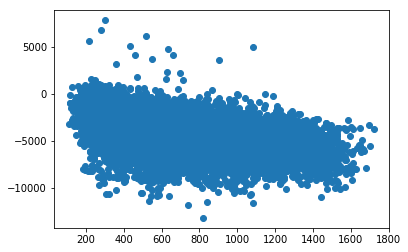

In [145]:
#Now let's create a scatter plot from those two variables we just created and see if there is any correlation

plt.scatter(df['DaysOnMarket'], df['TotalDepreciation'])
plt.show()

So there are quite a few data points which makes it hard to decipher any trends. Perhaps if we split the data by CustomerGrade we can get more insights. One thing to note is that there are a few cars that actually appreciated in value. Perhaps it would be good to look at those cars for insight. I would like to first see how the different customer grades depreciated, but before that I want to see if the odometer had any impact on the depreciation of a car

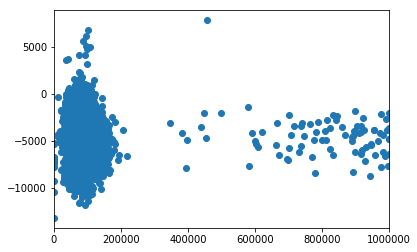

In [151]:
import pylab
plt.scatter(df['AuctionPurchaseOdometer'], df['TotalDepreciation'])
pylab.xlim([0,1000000])
plt.show()

As with the previous scatter plot, there are too many points to notice any trends. It is interesting to note that even cars with a million miles on the odometer don't depreciate as much as some cars with less than 200,000 miles on the odometer. Let us split the data by customer grade and see if there is any insight to be found.  

In [156]:
#find out how many different grades there are in customer grade
df.CustomerGrade.unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [158]:
#now split the data

dfa = df[df.CustomerGrade == 'A']
dfb = df[df.CustomerGrade == 'B']
dfc = df[df.CustomerGrade == 'C']
dfd = df[df.CustomerGrade == 'D']

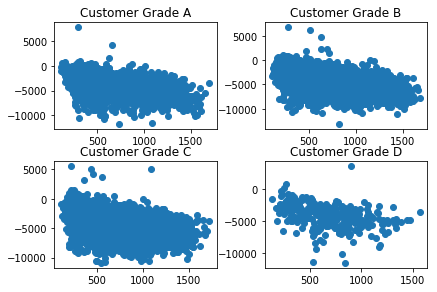

In [168]:
#Now plot depreciation by each customer grade and how long the car is on the market
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()
ax1 = plt.subplot(221)
ax1.title.set_text('Customer Grade A')
plt.scatter(dfa['DaysOnMarket'], dfa['TotalDepreciation'])
ax2 = plt.subplot(222)
ax2.title.set_text('Customer Grade B')
plt.scatter(dfb['DaysOnMarket'], dfb['TotalDepreciation'])
ax3 = plt.subplot(223)
ax3.title.set_text('Customer Grade C')
plt.scatter(dfc['DaysOnMarket'], dfc['TotalDepreciation'])
ax4 = plt.subplot(224)
ax4.title.set_text('Customer Grade D')
plt.scatter(dfd['DaysOnMarket'], dfd['TotalDepreciation'])

There are still many points per subgroup, but we can see a slight downward trend with all of the subgroups. There does not seem to be much difference, at least when looking at depreciation as a factor of time spent on the market. 

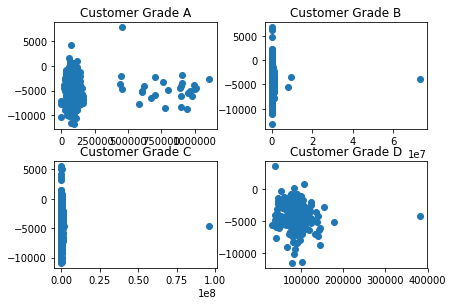

In [169]:
#Now plot depreciation by each customer grade and how many miles is on the odometer
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()
ax1 = plt.subplot(221)
ax1.title.set_text('Customer Grade A')
plt.scatter(dfa['AuctionPurchaseOdometer'], dfa['TotalDepreciation'])
ax2 = plt.subplot(222)
ax2.title.set_text('Customer Grade B')
plt.scatter(dfb['AuctionPurchaseOdometer'], dfb['TotalDepreciation'])
ax3 = plt.subplot(223)
ax3.title.set_text('Customer Grade C')
plt.scatter(dfc['AuctionPurchaseOdometer'], dfc['TotalDepreciation'])
ax4 = plt.subplot(224)
ax4.title.set_text('Customer Grade D')
plt.scatter(dfd['AuctionPurchaseOdometer'], dfd['TotalDepreciation'])

There is absolutely no correlation

As mentioned before, there were a good amount of cars that actually appreciated. Let's take a look at those cars. 

In [175]:
#isolate the data
dfappreciation = df[df.TotalDepreciation > 0]
dfappreciation.head()

,VehicleID,CustomerGrade,AuctionPurchaseDate,AuctionPurchaseAmount,AuctionSaleDate,AuctionSaleAmount,VehicleType,Year,Make,Model,Trim,BodyType,AuctionPurchaseOdometer,AutomaticTransmission,DriveType,DaysOnMarket,TotalDepreciation
81,25344,C,2014-07-21,6140.0,2015-03-17,6632.96,Truck,2009,Chevrolet,Colorado,Work Truck,Pickup,87560,1,4X2,239.0,492.96
116,25427,B,2014-08-06,7715.0,2015-03-17,7720.84,SUV,2008,Mercury,Mariner,V6,SUV,99846,1,AWD,223.0,5.84
168,25680,B,2014-10-22,8380.0,2015-07-28,9283.77,Car,2012,Chevrolet,Malibu,LT,Sedan,61938,1,FWD,279.0,903.77
253,21366,B,2014-05-14,9365.0,2015-04-09,9768.09,Truck,2008,Dodge,Dakota,SLT,Pickup,95751,1,4WD,330.0,403.09
270,2202,C,2013-07-24,10525.0,2015-06-09,11082.58,SUV,2010,Dodge,Nitro,SXT,SUV,88358,1,4X4,685.0,557.58


In [174]:
dfappreciation.describe()

,VehicleID,AuctionPurchaseAmount,AuctionSaleAmount,Year,AuctionPurchaseOdometer,AutomaticTransmission,DaysOnMarket,TotalDepreciation
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.0,93.000000,93.000000
mean,21038.967742,8216.537634,9343.224409,2009.172043,87765.129032,1.0,364.559140,1126.686774
std,9492.206172,2017.770910,2696.941616,2.361943,42203.324290,0.0,188.241892,1639.413968
min,1991.000000,2000.000000,3468.000000,2004.000000,36833.000000,1.0,125.000000,5.840000
25%,13309.000000,7040.000000,7832.000000,2008.000000,75386.000000,1.0,243.000000,212.700000
50%,25024.000000,8200.000000,8857.800000,2009.000000,87560.000000,1.0,300.000000,547.000000
75%,25886.000000,9345.000000,10289.000000,2011.000000,95689.000000,1.0,434.000000,941.140000
max,34984.000000,13475.000000,19823.360000,2013.000000,457583.000000,1.0,1084.000000,7828.360000


A total of 93 cars appreciated in value. The average car that appreciated, was sold for $1126.67 more than it was bought for. It was on the market for a year, and had close to 88,000 miles on the odometer. I would like to see which companies had the most number of cars that appreciated. A bar chart is a good way to visualize this. 

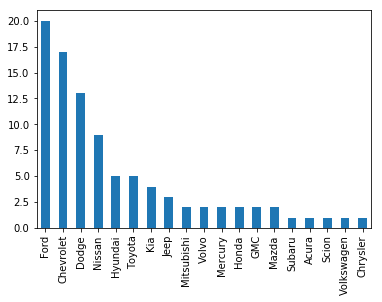

In [181]:
CountStatus = pd.value_counts(dfappreciation['Make'].values, sort=True)
CountStatus.plot.bar()

It seems American companies do well at auction, as Ford, Chevrolet, and Dodge have the most amount of cars tha appreciated in value. One could argue that their specialty cars like the Mustang, Camaro, Corvette, and Challenger could be highly covetted by collectors. Let us look at these three companies and see what kind of cars are the ones that are appreciating. 

In [186]:
dfford = df[df.Make == 'Ford']
dfchevy = df[df.Make == 'Chevrolet']
dfdodge = df[df.Make == 'Dodge']

In [190]:
dftopthree = pd.concat([dfford, dfchevy, dfdodge])

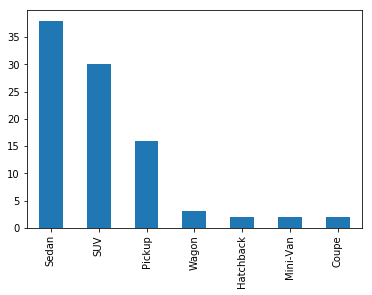

In [191]:
CountStatus = pd.value_counts(dfappreciation['BodyType'].values, sort=True)
CountStatus.plot.bar()

Surprisingly, it's the American companies Sedans and SUVs that comprise the majority of their appreciated cars. In fact there was only one coupe that appreciated in value.  